<a href="https://colab.research.google.com/github/seeanup/Week2_3/blob/main/G2M_Strategy_Case_Study_APudasaini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
- XYZ, a private firm in US needs to make a data driven decision to invest in a cab company based on available datasets from two cab companies.  Pick one company over another.
- Available datasets are: 
  - Cab Data (transaction details),
  - Customer_ID (contains unique identifier that links customer's demographic details), 
  - Transaction_ID (contains transaction to cusomter mapping and payment mode),
  - City (US cities, population and number of cab users)
  - Relevant Temperature data- this was retrieved from www.weather.gov

In [1]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
import xlrd



In [2]:
# read in data using pandas
Cab_Data = pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv")
Customer_ID = pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv")
Transaction_ID = pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv")
City = pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv")
Temp_2016_2018 = pd.read_csv("https://raw.githubusercontent.com/seeanup/Week2_3/main/Temp_2016-2018.csv")

#Exploratory Data Analysis (EDA) 

In [3]:
print(Cab_Data.head(), end= " = Cab_Data")
print()
print(Customer_ID.head(), end= "= Customer_ID")
print()
print(Transaction_ID.head(), end= "= Transaction_ID")
print()
print(City.head(), end= "= City")
print()
print(Temp_2016_2018.head(), end= "= Temp_2016_2018")

   Transaction ID  Date of Travel  ... Price Charged Cost of Trip
0        10000011           42377  ...        370.95      313.635
1        10000012           42375  ...        358.52      334.854
2        10000013           42371  ...        125.20       97.632
3        10000014           42376  ...        377.40      351.602
4        10000015           42372  ...        114.62       97.776

[5 rows x 7 columns] = Cab_Data
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536= Customer_ID
   Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card= Transaction

In [4]:
# check shape of each dataset
Cab_Data.shape, Customer_ID.shape, Transaction_ID.shape, City.shape, Temp_2016_2018.shape

((359392, 7), (49171, 4), (440098, 3), (20, 3), (21920, 4))

In [5]:
Temp_2016_2018

,Date,City,Mean Temp,DAY OF THE WEEK
0,2016-01-01,NEW YORK NY,38.0,FRIDAY
1,2016-01-02,NEW YORK NY,36.0,SATURDAY
2,2016-01-03,NEW YORK NY,40.0,SUNDAY
3,2016-01-04,NEW YORK NY,25.0,MONDAY
4,2016-01-05,NEW YORK NY,20.0,TUESDAY
...,...,...,...,...
21915,2018-12-27,BOSTON MA,34.0,THURSDAY
21916,2018-12-28,BOSTON MA,45.5,FRIDAY
21917,2018-12-29,BOSTON MA,43.0,SATURDAY
21918,2018-12-30,BOSTON MA,30.0,SUNDAY


# Pre-Processing
- Merge datasets into one

In [6]:
df = pd.merge(Cab_Data, City, on = 'City')
df1 = pd.merge(df, Transaction_ID, on = 'Transaction ID')
Cab_Data_Merged = pd.merge(df1, Customer_ID, on= 'Customer ID')
Cab_Data_Merged = Cab_Data_Merged.replace(',', '', regex = True)
Cab_Data_Merged['Date of Travel'] = Cab_Data_Merged['Date of Travel'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))  # converts number date of travel to actual date.
Cab_Data_Merged.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237


In [7]:
Temp_2016_2018 =  Temp_2016_2018.rename(columns={'Date':'Date of Travel'}) #rename Date to Date of Travel at Temp_2016_2016 dataframe.

Temp_2016_2018['Date of Travel'] = Temp_2016_2018['Date of Travel'].apply(lambda x: pd.Timestamp(x)) # converts Date of Travel to Timestamp

Temp_2016_2018.head()

print(type(Temp_2016_2018['Date of Travel'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [8]:
print(type(Cab_Data_Merged['Date of Travel'][0]))

print(type(Cab_Data_Merged['Date of Travel'][0]) == type(Temp_2016_2018['Date of Travel'][0]))  # confirm Date of Travel on both dataframe are the same


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
True


In [9]:
#Combine Cab_Data_Merged and Temp_2016_2018 based on Date and City

Cab_Data_Final = pd.merge(Cab_Data_Merged, Temp_2016_2018, on= ['Date of Travel', 'City'])
Cab_Data_Final


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Mean Temp,DAY OF THE WEEK
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813,51.0,FRIDAY
1,10000397,2016-01-08,Yellow Cab,ATLANTA GA,18.90,609.50,267.6240,814885,24701,29009,Card,Male,28,15771,51.0,FRIDAY
2,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813,79.0,SATURDAY
3,10351139,2018-07-21,Yellow Cab,ATLANTA GA,28.62,642.58,384.6528,814885,24701,28901,Card,Female,31,8156,79.0,SATURDAY
4,10351113,2018-07-21,Yellow Cab,ATLANTA GA,31.03,516.61,402.1488,814885,24701,28160,Card,Male,31,6942,79.0,SATURDAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10334103,2018-05-30,Pink Cab,WASHINGTON DC,44.85,536.19,493.3500,418859,127001,51079,Card,Female,37,4302,76.0,WEDNESDAY
359388,10335583,2018-05-30,Yellow Cab,WASHINGTON DC,36.86,682.46,477.7056,418859,127001,52941,Card,Female,45,24808,76.0,WEDNESDAY
359389,10335605,2018-05-30,Yellow Cab,WASHINGTON DC,9.20,154.85,117.0240,418859,127001,51610,Card,Male,30,7551,76.0,WEDNESDAY
359390,10335561,2018-05-30,Yellow Cab,WASHINGTON DC,6.42,109.14,80.8920,418859,127001,52033,Card,Female,50,11401,76.0,WEDNESDAY


In [10]:
#Set Index
Cab_Data_Final = Cab_Data_Final.set_index('Date of Travel')


In [11]:
#Sort to take advantage of partial index sorting
Cab_Data_Final = Cab_Data_Final.sort_index()
Cab_Data_Final['2016-01']

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Mean Temp,DAY OF THE WEEK
Date of Travel,,,,,,,,,,,,,,,
2016-01-02,10000528,Yellow Cab,CHICAGO IL,34.56,746.85,427.1616,1955130,164468,5728,Cash,Male,19,2827,26.0,SATURDAY
2016-01-02,10001340,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,418859,127001,52536,Card,Male,24,10606,40.0,SATURDAY
2016-01-02,10001355,Yellow Cab,WASHINGTON DC,7.84,175.86,104.4288,418859,127001,53314,Card,Male,18,22770,40.0,SATURDAY
2016-01-02,10001359,Yellow Cab,WASHINGTON DC,32.98,700.39,423.4632,418859,127001,53395,Card,Male,59,3269,40.0,SATURDAY
2016-01-02,10001366,Yellow Cab,WASHINGTON DC,34.88,737.78,418.5600,418859,127001,52350,Card,Male,55,30596,40.0,SATURDAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-31,10007074,Yellow Cab,WASHINGTON DC,19.57,384.06,244.2336,418859,127001,52031,Card,Female,31,4584,46.5,SUNDAY
2016-01-31,10007078,Yellow Cab,WASHINGTON DC,28.71,557.53,365.1912,418859,127001,52166,Card,Female,42,15169,46.5,SUNDAY
2016-01-31,10007089,Yellow Cab,WASHINGTON DC,28.56,548.59,363.2832,418859,127001,52323,Card,Female,64,2557,46.5,SUNDAY


In [12]:
#check null values
null_count = Cab_Data_Final.isnull().sum()
null_count

Transaction ID        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Mean Temp             0
DAY OF THE WEEK       0
dtype: int64

In [13]:
#Check feature data types
Cab_Data_Final.dtypes

Transaction ID          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Population             object
Users                  object
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Mean Temp             float64
DAY OF THE WEEK        object
dtype: object

In [14]:
#Convert Population and Users from Object to int64
Cab_Data_Final['Population'] = Cab_Data_Final['Population'].astype(int)
Cab_Data_Final['Users'] = Cab_Data_Final['Users'].astype(int)

# Feature manipulation on profit/loss
Cab_Data_Final['Profit'] = round((Cab_Data_Final['Price Charged'] - Cab_Data_Final['Cost of Trip']),2)

Cab_Data_Final.head()


,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Mean Temp,DAY OF THE WEEK,Profit
Date of Travel,,,,,,,,,,,,,,,,
2016-01-02,10000528,Yellow Cab,CHICAGO IL,34.56,746.85,427.1616,1955130,164468,5728,Cash,Male,19,2827,26.0,SATURDAY,319.69
2016-01-02,10001340,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,418859,127001,52536,Card,Male,24,10606,40.0,SATURDAY,66.68
2016-01-02,10001355,Yellow Cab,WASHINGTON DC,7.84,175.86,104.4288,418859,127001,53314,Card,Male,18,22770,40.0,SATURDAY,71.43
2016-01-02,10001359,Yellow Cab,WASHINGTON DC,32.98,700.39,423.4632,418859,127001,53395,Card,Male,59,3269,40.0,SATURDAY,276.93
2016-01-02,10001366,Yellow Cab,WASHINGTON DC,34.88,737.78,418.5600,418859,127001,52350,Card,Male,55,30596,40.0,SATURDAY,319.22


In [15]:
#Check feature data types again to verify Population and Users are converted to int64.
Cab_Data_Final.dtypes

Transaction ID          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Population              int64
Users                   int64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Mean Temp             float64
DAY OF THE WEEK        object
Profit                float64
dtype: object

## Profit Distribution

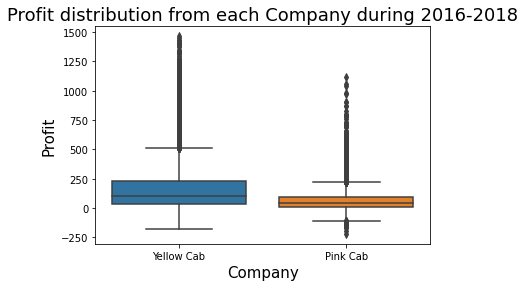

In [16]:
#Boxplot distribution for Profit from Yellow and Pink Cab
ax = sns.boxplot(x = 'Company',  y = 'Profit', data = Cab_Data_Final, order = ['Yellow Cab', 'Pink Cab'])
ax.set_title('Profit distribution from each Company during 2016-2018', fontsize =18);
ax.set_xlabel('Company', fontsize=15)
ax.set_ylabel('Profit', fontsize=15);


- A high level glance from the above boxplot between Company and Profit suggests the Yellow Cab is certainly profitable than Pink Cab.

- Let's assume the outliers seen from the above boxplot are real since there a lot.

## Yearly Profit from each company

In [17]:
# Yearly Profit
Cab_Data_2016 = Cab_Data_Final['2016']
Cab_Data_2017 = Cab_Data_Final['2017']
Cab_Data_2018 = Cab_Data_Final['2018']

Cab_Data_2016_Yellow_Cab = Cab_Data_2016[Cab_Data_2016['Company'] == 'Yellow Cab']
Cab_Data_2016_Pink_Cab = Cab_Data_2016[Cab_Data_2016['Company'] == 'Pink Cab']

Cab_Data_2017_Yellow_Cab = Cab_Data_2017[Cab_Data_2017['Company'] == 'Yellow Cab']
Cab_Data_2017_Pink_Cab = Cab_Data_2017[Cab_Data_2017['Company'] == 'Pink Cab']

Cab_Data_2018_Yellow_Cab = Cab_Data_2018[Cab_Data_2018['Company'] == 'Yellow Cab']
Cab_Data_2018_Pink_Cab = Cab_Data_2018[Cab_Data_2018['Company'] == 'Pink Cab']


#2016 Profit from each cab
Yellow_Cab_Profit_2016 = round(Cab_Data_2016_Yellow_Cab['Profit'].sum(),2)
Pink_Cab_Profit_2016 = round(Cab_Data_2016_Pink_Cab['Profit'].sum(),2)

#2017 Profit from each cab
Yellow_Cab_Profit_2017 = round(Cab_Data_2017_Yellow_Cab['Profit'].sum(),2)
Pink_Cab_Profit_2017 = round(Cab_Data_2017_Pink_Cab['Profit'].sum(),2)

#2018 Profit from each cab
Yellow_Cab_Profit_2018 = round(Cab_Data_2018_Yellow_Cab['Profit'].sum(),2)
Pink_Cab_Profit_2018 = round(Cab_Data_2018_Pink_Cab['Profit'].sum(),2)

print(Yellow_Cab_Profit_2016, end= '= Yellow Cab Profit 2016')
print()
print(Pink_Cab_Profit_2016, end= '= Pink Cab Profit 2016')
print()
print(Yellow_Cab_Profit_2017, end= '= Yellow Cab Profit 2017')
print()
print(Pink_Cab_Profit_2017, end= '= Pink Cab Profit 2017')
print()
print(Yellow_Cab_Profit_2018, end= '= Yellow Cab Profit 2018')
print()
print(Pink_Cab_Profit_2018, end= '= Pink Cab Profit 2018')


13926996.4= Yellow Cab Profit 2016
1713511.27= Pink Cab Profit 2016
16575977.4= Yellow Cab Profit 2017
2033655.24= Pink Cab Profit 2017
13517398.79= Yellow Cab Profit 2018
1560162.0= Pink Cab Profit 2018

In [18]:
#Put yearly profit from each cab in a new dataframe

Yearly_Profit = pd.DataFrame(data = {'Year': [2016, 2016, 2017, 2017, 2018, 2018], 'Company':['Yellow Cab', 'Pink Cab', 'Yellow Cab', 'Pink Cab', 'Yellow Cab', 'Pink Cab'], 
                                     'Profit': [Yellow_Cab_Profit_2016, Pink_Cab_Profit_2016,Yellow_Cab_Profit_2017, Pink_Cab_Profit_2017, Yellow_Cab_Profit_2018, Pink_Cab_Profit_2018]})
Yearly_Profit


,Year,Company,Profit
0,2016,Yellow Cab,13926996.40
1,2016,Pink Cab,1713511.27
2,2017,Yellow Cab,16575977.40
3,2017,Pink Cab,2033655.24
4,2018,Yellow Cab,13517398.79
5,2018,Pink Cab,1560162.00


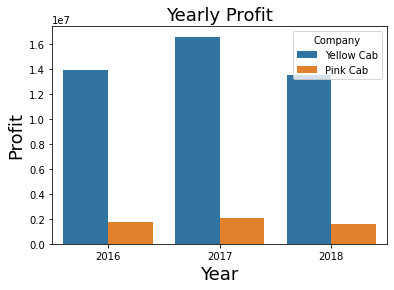

In [19]:
# Plot yearly profit
Yearly_Profit_Plot = sns.barplot(x ='Year', y ='Profit', hue = 'Company', data = Yearly_Profit)
sns.set(rc={'figure.figsize':(10,6)})
Yearly_Profit_Plot.set_xlabel("Year", fontsize = 18)
Yearly_Profit_Plot.set_ylabel("Profit", fontsize = 18)
Yearly_Profit_Plot.set_title("Yearly Profit", fontsize = 18);




From the above Yearly Profit plot, Yellow Cab company is still the clear winner!  In 2016, Yellow Cab Profit was 14 million whereas Pink Cab's was 1.7 million.  Similar trend can be seen for 2017 and 2018!

## Profit by the day of the week from each company

In [20]:
# Let's look at Profit by the day of the week for each Cab during 2016 through 2018
agg_profit = Cab_Data_Final.groupby(['DAY OF THE WEEK', 'Company'])['Profit'].sum().unstack().fillna(0)
agg_profit


Company,Pink Cab,Yellow Cab
DAY OF THE WEEK,,
FRIDAY,1333189.28,10549810.57
MONDAY,332560.11,3172372.84
SATURDAY,1235506.87,10042410.24
SUNDAY,1280728.08,9758349.11
THURSDAY,449454.49,4141052.87
TUESDAY,338925.39,3179839.56
WEDNESDAY,336964.29,3176537.40


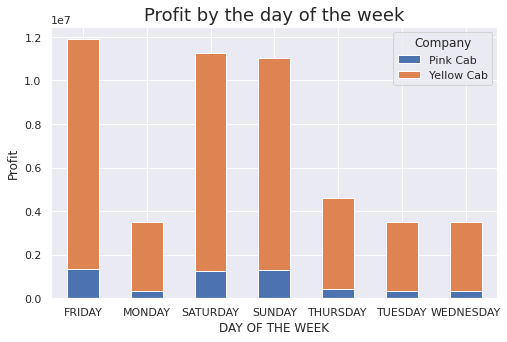

In [21]:
# Stacked Plot for Day of the week versus Profit through 2016-2018

agg_profit.plot(kind='bar', stacked= True, figsize =(8,5))  # note this is available as pandas plot
plt.title('Profit by the day of the week', fontsize = 18)
plt.xticks(rotation=0, ha= 'center')
plt.ylabel('Profit');



- From above plot you can see weekends always brought in higher profits for both cabs.  Yellow cabs did make a lot more profit than Pink Cab.

## Profit by City for each company

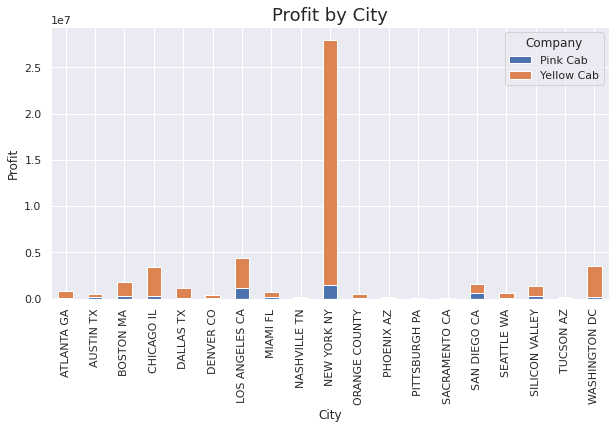

In [22]:
# Profit by City and Company
agg_profit_by_city = Cab_Data_Final.groupby(['City', 'Company'])['Profit'].sum().unstack().fillna(0)

# Plot Day of the week versus Profit
agg_profit_by_city.plot(kind='bar', stacked= True, figsize =(10,5))  # note this is available as pandas plot
plt.title('Profit by City', fontsize = 18)
plt.xticks(rotation=90, ha= 'center')
plt.ylabel('Profit');


From above plot you can see New York City brings in more profit for both cab type.  Again, Yellow can does bring in way more profit than pink cab.

## Quarterly Profit analysis

In [23]:
#Let's do some pre-processing to plot Quarterly Profit throughout 2016-2018 to see which cab brough in more profits.

#2016
Q1_2016 = Cab_Data_Final['2016-01':'2016-03']
Q2_2016 = Cab_Data_Final['2016-04':'2016-06']
Q3_2016 = Cab_Data_Final['2016-07':'2016-09']
Q4_2016 = Cab_Data_Final['2016-10':'2016-12']

#2017
Q1_2017 = Cab_Data_Final['2017-01':'2017-03']
Q2_2017 = Cab_Data_Final['2017-04':'2017-06']
Q3_2017 = Cab_Data_Final['2017-07':'2017-09']
Q4_2017 = Cab_Data_Final['2017-10':'2017-12']

#2018
Q1_2018 = Cab_Data_Final['2018-01':'2018-03']
Q2_2018 = Cab_Data_Final['2018-04':'2018-06']
Q3_2018 = Cab_Data_Final['2018-07':'2018-09']
Q4_2018 = Cab_Data_Final['2018-10':'2018-12']




In [24]:
#Putting together Quarter data.
Q1 = pd.concat([Q1_2016, Q1_2017, Q1_2018])
Q2 = pd.concat([Q2_2016, Q2_2017, Q2_2018])
Q3 = pd.concat([Q3_2016, Q3_2017, Q3_2018])
Q4 = pd.concat([Q4_2016, Q1_2017, Q4_2018])

In [25]:
#Quarter Profit Summation for each company.
agg_profit_Q1 = pd.DataFrame(round(Q1.groupby(['Company'])['Profit'].sum(),2)).rename(columns={'Profit': 'Q1_Profit'})
agg_profit_Q2 = pd.DataFrame(round(Q2.groupby(['Company'])['Profit'].sum(),2)).rename(columns={'Profit': 'Q2_Profit'})
agg_profit_Q3 = pd.DataFrame(round(Q3.groupby(['Company'])['Profit'].sum(),2)).rename(columns={'Profit': 'Q3_Profit'})
agg_profit_Q4 = pd.DataFrame(round(Q4.groupby(['Company'])['Profit'].sum(),2)).rename(columns={'Profit': 'Q4_Profit'})

agg_quarter_profit = agg_profit_Q1.join(agg_profit_Q2).join(agg_profit_Q3).join(agg_profit_Q4)
agg_quarter_profit




,Q1_Profit,Q2_Profit,Q3_Profit,Q4_Profit
Company,,,,
Pink Cab,939192.85,647147.28,1184571.51,1943520.77
Yellow Cab,9485629.22,10639424.14,9860215.44,12349471.65


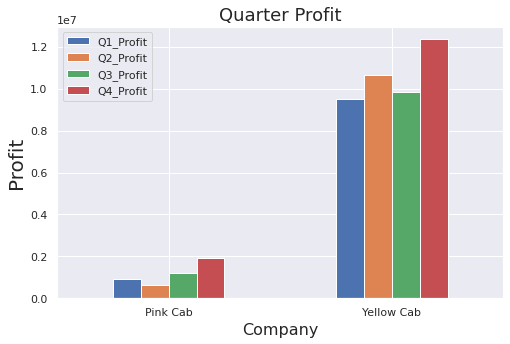

In [26]:
#Plotting Quarter Profit summation for each company.   
agg_quarter_profit.plot(kind='bar', stacked= False, figsize =(8,5))
plt.title('Quarter Profit', fontsize = 18)
plt.xticks(rotation=0, ha= 'center')
plt.ylabel('Profit', fontsize = 20)
plt.xlabel('Company', fontsize = 16);

In [27]:
# Also check mean temperature at each quarter to see if temperature has any effect!
print(round(Q1['Mean Temp'].mean()), end="= Q1 temp")
print()
print(round(Q2['Mean Temp'].mean()), end="= Q2 temp")
print()
print(round(Q3['Mean Temp'].mean()), end="= Q3 temp")
print()
print(round(Q4['Mean Temp'].mean()), end="= Q4 temp")

43= Q1 temp
65= Q2 temp
75= Q3 temp
50= Q4 temp

From above bar plot, it can be said that fourth quarter brought in better business for both companies, but Yellow Cab business is significantly higher!  Fourth quarter profits can be attributed to major holiday seasons in the United States.  Temp mean was run at each quarter, but does not seem to suggest the profit has an effect- looks like mostly driven by holiday seasons.

## KM Travelled vs Average Profit

- Let's explore KM Travelled vs Average Profit to see what company did better from 2016-2018.

In [28]:
# Pre-processing for KM travelled vs Average Profit analysis.

#Average KM travelled vs Average Profit

#2016
avg_KM_travelled_2016_Yellow_Cab = round(Cab_Data_2016_Yellow_Cab['2016']['KM Travelled'].mean(),2)
avg_Profit_2016_Yellow_Cab = round(Cab_Data_2016_Yellow_Cab['2016']['Profit'].mean(),2)

avg_KM_travelled_2016_Pink_Cab = round(Cab_Data_2016_Pink_Cab['2016']['KM Travelled'].mean(),2)
avg_Profit_2016_Pink_Cab = round(Cab_Data_2016_Pink_Cab['2016']['Profit'].mean(),2)

#2017
avg_KM_travelled_2017_Yellow_Cab = round(Cab_Data_2017_Yellow_Cab['2017']['KM Travelled'].mean(),2)
avg_Profit_2017_Yellow_Cab = round(Cab_Data_2017_Yellow_Cab['2017']['Profit'].mean(),2)

avg_KM_travelled_2017_Pink_Cab = round(Cab_Data_2017_Pink_Cab['2017']['KM Travelled'].mean(),2)
avg_Profit_2017_Pink_Cab = round(Cab_Data_2017_Pink_Cab['2017']['Profit'].mean(),2)

#2018
avg_KM_travelled_2018_Yellow_Cab = round(Cab_Data_2018_Yellow_Cab['2018']['KM Travelled'].mean(),2)
avg_Profit_2018_Yellow_Cab = round(Cab_Data_2018_Yellow_Cab['2018']['Profit'].mean(),2)

avg_KM_travelled_2018_Pink_Cab = round(Cab_Data_2018_Pink_Cab['2018']['KM Travelled'].mean(),2)
avg_Profit_2018_Pink_Cab = round(Cab_Data_2018_Pink_Cab['2018']['Profit'].mean(),2)


KM_travel_Avg_Profit = pd.DataFrame({'Company': ['Yellow Cab', 'Pink Cab', 'Yellow Cab', 'Pink Cab', 'Yellow Cab','Pink Cab'],
                                                 'Year': ['2016', '2016','2017', '2017','2018', '2018'], 
                                                 'KM_Travelled' :[avg_KM_travelled_2016_Yellow_Cab, avg_KM_travelled_2016_Pink_Cab, avg_KM_travelled_2017_Yellow_Cab,  avg_KM_travelled_2017_Pink_Cab, 
                                                                  avg_KM_travelled_2018_Yellow_Cab,avg_KM_travelled_2018_Pink_Cab,],
                                     'Profit':[avg_Profit_2016_Yellow_Cab, avg_Profit_2016_Pink_Cab, avg_Profit_2017_Yellow_Cab,avg_Profit_2017_Pink_Cab,
                                     avg_Profit_2018_Yellow_Cab, avg_Profit_2018_Pink_Cab]})


KM_travel_Avg_Profit




,Company,Year,KM_Travelled,Profit
0,Yellow Cab,2016,22.62,169.35
1,Pink Cab,2016,22.47,68.32
2,Yellow Cab,2017,22.56,168.82
3,Pink Cab,2017,22.62,67.07
4,Yellow Cab,2018,22.54,143.42
5,Pink Cab,2018,22.58,53.23


### Plotting- KM Travelled versus Profit average

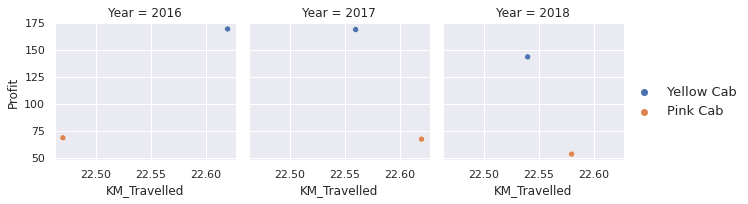

In [29]:
#Plot KM_Travelled average versus Profit average
h= sns.FacetGrid(data = KM_travel_Avg_Profit, col = "Year", height = 3)
h.map(sns.scatterplot,'KM_Travelled','Profit', 'Company')
h.add_legend(fontsize = 13);



KM_Travelled did not vary that much for each company, but Yellow Cab significantly brought in more profits!

## Yearly Income versus Profit

In [30]:
# Pre-Processing step to explore Yearly Income versus Profit.

#Yearly Income summation that rode different cabs.

#2016 income from each cab
Yellow_Cab_Income_2016 = round(Cab_Data_2016_Yellow_Cab['Income (USD/Month)'].mean(),2)
Pink_Cab_Income_2016 = round(Cab_Data_2016_Pink_Cab['Income (USD/Month)'].mean(),2)

#2017 Income from each cab
Yellow_Cab_Income_2017 = round(Cab_Data_2017_Yellow_Cab['Income (USD/Month)'].mean(),2)
Pink_Cab_Income_2017 = round(Cab_Data_2017_Pink_Cab['Income (USD/Month)'].mean(),2)

#2018 Income from each cab
Yellow_Cab_Income_2018 = round(Cab_Data_2018_Yellow_Cab['Income (USD/Month)'].mean(),2)
Pink_Cab_Income_2018 = round(Cab_Data_2018_Pink_Cab['Income (USD/Month)'].mean(),2)

In [31]:
#Average yearly profit
Avg_Yellow_Cab_Profit_2016 = round(Cab_Data_2016_Yellow_Cab['Profit'].mean(),2)
Avg_Pink_Cab_Profit_2016 = round(Cab_Data_2016_Pink_Cab['Profit'].mean(),2)

Avg_Yellow_Cab_Profit_2017 = round(Cab_Data_2017_Yellow_Cab['Profit'].mean(),2)
Avg_Pink_Cab_Profit_2017 = round(Cab_Data_2017_Pink_Cab['Profit'].mean(),2)

Avg_Yellow_Cab_Profit_2018 = round(Cab_Data_2018_Yellow_Cab['Profit'].mean(),2)
Avg_Pink_Cab_Profit_2018 = round(Cab_Data_2018_Pink_Cab['Profit'].mean(),2)


#Yearly Profit and Income summation
Yearly_Profit_Income = pd.DataFrame(data = {'Year': [2016, 2016, 2017, 2017, 2018, 2018], 'Company':['Yellow Cab', 'Pink Cab', 'Yellow Cab', 'Pink Cab', 'Yellow Cab', 'Pink Cab'], 
                                     'Avg_Profit': [Avg_Yellow_Cab_Profit_2016, Avg_Pink_Cab_Profit_2016,Avg_Yellow_Cab_Profit_2017, Avg_Pink_Cab_Profit_2017, Avg_Yellow_Cab_Profit_2018, Avg_Pink_Cab_Profit_2018],
                                     'Avg_Income_sum': [Yellow_Cab_Income_2016, Pink_Cab_Income_2016,Yellow_Cab_Income_2017, Pink_Cab_Income_2017, Yellow_Cab_Income_2018, Pink_Cab_Income_2018] })
Yearly_Profit_Income

,Year,Company,Avg_Profit,Avg_Income_sum
0,2016,Yellow Cab,169.35,15034.41
1,2016,Pink Cab,68.32,15124.24
2,2017,Yellow Cab,168.82,15069.11
3,2017,Pink Cab,67.07,15058.79
4,2018,Yellow Cab,143.42,15031.07
5,2018,Pink Cab,53.23,15003.53


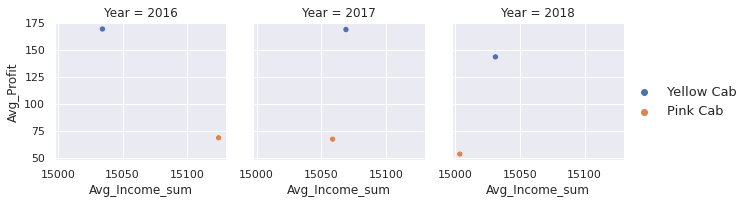

In [32]:
# Plotting Average Income versus Average Profit
i= sns.FacetGrid(data = Yearly_Profit_Income, col = "Year")
i.map(sns.scatterplot,'Avg_Income_sum','Avg_Profit', 'Company')
i.add_legend(fontsize = 13);

Above plot shows average income population that rode Pink or Yellow Cab did not vary.  However, it clearly shows Yellow Cab was generating significantly higher margin regardless of average income at each year!

# Conclusion from EDA

From EDA and with various plots such as overall profit, yearly profit, profit by the day of the week, profit by city, quaterly profit, KM Travelled versus profit, yearly income versus profit, Yellow Cab company beats Pink Cab Company in every scenario analysed here.  Thus, I recommend XYZ firm to invest in Yellow Cab Company.  

 

#Machine Learning
Based on EDA we know that Yellow Cab is definetly a better choice than Pink Cab.  Let's help XYZ company building a machine learning model for Yellow Cab that they can use to predict Profit in future.  

Let's use 2016 data to build the model.  The plan is to use 80% as a training set and 20% as a test on 2016 data to build it.  Once the model is trained and tested, we can use features from few 2017 Q1 data to predict the target variable (Profit) and compare against the real data.

## Corrleation
- Most of the pre-processing has already been done while doing EDA above, like combining different dataframes, that adding new features, such as Profit, DAY OF THE WEEK (for travel), Mean Temp.  Our target is numerical, we aim to predict the target based on combination of features that are numerical when considering each type of cab.  Pearson correlation coefficient is a good candidate to decide on what features to consider to reduce noise on machine learning model. 

## Yellow Cab Machine Learning

In [33]:
#Correlation (#Feature Engineering)
Cab_Data_2016_Yellow_Cab.corr()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Age,Income (USD/Month),Mean Temp,Profit
Transaction ID,1.000000,-0.000637,-0.065409,-0.000494,0.063108,0.033288,-0.042645,-0.000760,0.002716,-0.052962,-0.107297
KM Travelled,-0.000637,1.000000,0.855024,0.993384,-0.003675,-0.004583,-0.000180,0.001585,-0.000082,-0.003489,0.509050
Price Charged,-0.065409,0.855024,1.000000,0.849253,0.345200,0.288881,-0.223386,-0.004173,0.003521,-0.031791,0.878349
Cost of Trip,-0.000494,0.993384,0.849253,1.000000,-0.003829,-0.004719,-0.000397,0.002035,0.000057,-0.003673,0.493553
Population,0.063108,-0.003675,0.345200,-0.003829,1.000000,0.923684,-0.675398,-0.012696,0.011787,-0.082058,0.572092
Users,0.033288,-0.004583,0.288881,-0.004719,0.923684,1.000000,-0.630628,-0.011389,0.010081,-0.131921,0.480126
Customer ID,-0.042645,-0.000180,-0.223386,-0.000397,-0.675398,-0.630628,1.000000,-0.003620,-0.012119,0.020300,-0.367609
Age,-0.000760,0.001585,-0.004173,0.002035,-0.012696,-0.011389,-0.003620,1.000000,0.001380,-0.001450,-0.008716
Income (USD/Month),0.002716,-0.000082,0.003521,0.000057,0.011787,0.010081,-0.012119,0.001380,1.000000,-0.002524,0.005749
Mean Temp,-0.052962,-0.003489,-0.031791,-0.003673,-0.082058,-0.131921,0.020300,-0.001450,-0.002524,1.000000,-0.049043


Based on a high level correlation data (closer to 0.5 or higher), features that cab be utilized are KM Travelled, Price Charged, Cost of Trip, Population & Users.  However, Profits are made from Users not the population and also Users and Population are highly correlated (0.92 see above table). So the final features contain KM Travelled, Cost of Trip, Price Charged and Users.  

Side note:  Population feature was also included during machine learning modelling trial but later on taken out after analyzing correlation data and using some domain knowledge.

In [34]:
#Create X Features and y labels

#2016 Yellow Cab
y1 = Cab_Data_2016_Yellow_Cab['Profit'] 
X1 = Cab_Data_2016_Yellow_Cab[['KM Travelled', 'Cost of Trip', 'Price Charged','Users']]

In [35]:
#Create training and test sets using scikit-learn
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state =42)
print(len(X1), len(X1_train), len(X1_test))

82239 65791 16448


In [36]:
# Build a model

#1. Set a random seed
tf.random.set_seed(42)

#2. Create a model
Yellow_Cab_Model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation ='relu'),
    tf.keras.layers.Dense(5, activation ='relu'),
    tf.keras.layers.Dense(5, activation ='relu'),
    tf.keras.layers.Dense(1)
])

#3. Compile the model
Yellow_Cab_Model.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01031),
                         metrics = (['mae']))

#4. Fit the model

history_1 = Yellow_Cab_Model.fit(X1_train, y1_train, epochs = 200)

Epoch 1/200
2056/2056 [==============================] - 4s 2ms/step - loss: 150.0350 - mae: 150.0350
Epoch 2/200
2056/2056 [==============================] - 4s 2ms/step - loss: 43.9068 - mae: 43.9068
Epoch 3/200
2056/2056 [==============================] - 4s 2ms/step - loss: 25.8801 - mae: 25.8801
Epoch 4/200
2056/2056 [==============================] - 5s 2ms/step - loss: 24.0250 - mae: 24.0250
Epoch 5/200
2056/2056 [==============================] - 9s 4ms/step - loss: 22.1776 - mae: 22.1776
Epoch 6/200
2056/2056 [==============================] - 3s 2ms/step - loss: 19.0341 - mae: 19.0341
Epoch 7/200
2056/2056 [==============================] - 3s 2ms/step - loss: 19.4452 - mae: 19.4452
Epoch 8/200
2056/2056 [==============================] - 3s 2ms/step - loss: 17.8061 - mae: 17.8061
Epoch 9/200
2056/2056 [==============================] - 4s 2ms/step - loss: 20.7345 - mae: 20.7345
Epoch 10/200
2056/2056 [==============================] - 3s 2ms/step - loss: 17.1746 - mae: 17.17

In [37]:
#5. Evaluate the model with the testing data
Yellow_Cab_Model.evaluate(X1_test, y1_test)


514/514 [==============================] - 1s 2ms/step - loss: 2.0760 - mae: 2.0760


[2.075977087020874, 2.075977087020874]

- Note MAE of 2.07 on test data.  Pretty good! However, let's check on few Q1 2017 data from Yellow Cab that the model has NOT seen and see how accurate it gets.  This is the real test in any machine learning models.

In [38]:
#Let's review the data from Q1 2017 for Yellow Cab and pick few of them and feed them to our machine learning model.
Cab_Data_2017_Yellow_Cab['2017-01':'2017-03']

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Mean Temp,DAY OF THE WEEK,Profit
Date of Travel,,,,,,,,,,,,,,,,
2017-01-01,10136264,Yellow Cab,WASHINGTON DC,35.52,827.26,494.4384,418859,127001,53366,Card,Male,22,14869,46.5,SUNDAY,332.82
2017-01-01,10129921,Yellow Cab,MIAMI FL,14.43,197.65,199.1340,1339155,17675,9177,Card,Male,33,15893,77.0,SUNDAY,-1.48
2017-01-01,10129882,Yellow Cab,MIAMI FL,15.96,223.41,204.9264,1339155,17675,11914,Cash,Male,27,19560,77.0,SUNDAY,18.48
2017-01-01,10132896,Yellow Cab,CHICAGO IL,28.80,517.57,383.6160,1955130,164468,4816,Card,Female,64,18791,28.5,SUNDAY,133.95
2017-01-01,10129480,Yellow Cab,CHICAGO IL,27.12,462.55,357.9840,1955130,164468,5887,Cash,Female,25,3815,28.5,SUNDAY,104.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-31,10158543,Yellow Cab,ATLANTA GA,33.32,740.96,423.8304,814885,24701,28975,Card,Male,29,4560,65.5,FRIDAY,317.13
2017-03-31,10158565,Yellow Cab,AUSTIN TX,19.80,476.22,254.2320,698371,14978,34148,Card,Male,64,6779,70.5,FRIDAY,221.99
2017-03-31,10158561,Yellow Cab,AUSTIN TX,4.56,100.61,63.4752,698371,14978,35499,Cash,Female,54,6543,70.5,FRIDAY,37.13


In [39]:
#Pick random 2017 Q1 data, combine them and assign to a new dataframe Q1_2017_Yellow_Cab_Real
Q1_2017_Yellow_Cab_data_1 = Cab_Data_2017_Yellow_Cab[Cab_Data_2017_Yellow_Cab['Transaction ID'] == 10136264]
Q1_2017_Yellow_Cab_data_2 = Cab_Data_2017_Yellow_Cab[Cab_Data_2017_Yellow_Cab['Transaction ID'] == 10129480]
Q1_2017_Yellow_Cab_data_3 = Cab_Data_2017_Yellow_Cab[Cab_Data_2017_Yellow_Cab['Transaction ID'] == 10158543]
Q1_2017_Yellow_Cab_data_4 = Cab_Data_2017_Yellow_Cab[Cab_Data_2017_Yellow_Cab['Transaction ID'] == 10159677]


Q1_2017_Yellow_Cab_Real = pd.concat([Q1_2017_Yellow_Cab_data_1,Q1_2017_Yellow_Cab_data_2, Q1_2017_Yellow_Cab_data_3, Q1_2017_Yellow_Cab_data_4])

# Drop Profit label variable and only pick features that model was trained on to make predictions
Q1_2017_Yellow_Cab_data_1_forML = Q1_2017_Yellow_Cab_data_1[['KM Travelled', 'Cost of Trip', 'Price Charged', 'Users']]
Q1_2017_Yellow_Cab_data_2_forML = Q1_2017_Yellow_Cab_data_2[['KM Travelled', 'Cost of Trip', 'Price Charged', 'Users']]
Q1_2017_Yellow_Cab_data_3_forML = Q1_2017_Yellow_Cab_data_3[['KM Travelled', 'Cost of Trip', 'Price Charged', 'Users']]
Q1_2017_Yellow_Cab_data_4_forML = Q1_2017_Yellow_Cab_data_4[['KM Travelled', 'Cost of Trip', 'Price Charged', 'Users']]


Q1_2017_Yellow_Cab_Real 



,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Mean Temp,DAY OF THE WEEK,Profit
Date of Travel,,,,,,,,,,,,,,,,
2017-01-01,10136264,Yellow Cab,WASHINGTON DC,35.52,827.26,494.4384,418859,127001,53366,Card,Male,22,14869,46.5,SUNDAY,332.82
2017-01-01,10129480,Yellow Cab,CHICAGO IL,27.12,462.55,357.9840,1955130,164468,5887,Cash,Female,25,3815,28.5,SUNDAY,104.57
2017-03-31,10158543,Yellow Cab,ATLANTA GA,33.32,740.96,423.8304,814885,24701,28975,Card,Male,29,4560,65.5,FRIDAY,317.13
2017-03-31,10159677,Yellow Cab,PITTSBURGH PA,6.18,135.11,82.3176,542085,3643,48051,Card,Male,63,14766,48.5,FRIDAY,52.79


In [40]:
#6. Now lets predict using our model and see how they match with real data points

#Predict
Q1_2017_Yellow_Cab_data_1_from_ML = round(Yellow_Cab_Model.predict(Q1_2017_Yellow_Cab_data_1_forML).astype(float)[0][0],2)
Q1_2017_Yellow_Cab_data_2_from_ML = round(Yellow_Cab_Model.predict(Q1_2017_Yellow_Cab_data_2_forML).astype(float)[0][0],2)
Q1_2017_Yellow_Cab_data_3_from_ML = round(Yellow_Cab_Model.predict(Q1_2017_Yellow_Cab_data_3_forML).astype(float)[0][0],2)
Q1_2017_Yellow_Cab_data_4_from_ML = round(Yellow_Cab_Model.predict(Q1_2017_Yellow_Cab_data_4_forML).astype(float)[0][0],2)


#Make a dataframe for predicted values from ML model
column_data = {'Predicted Profit':[Q1_2017_Yellow_Cab_data_1_from_ML,Q1_2017_Yellow_Cab_data_2_from_ML,Q1_2017_Yellow_Cab_data_3_from_ML,Q1_2017_Yellow_Cab_data_4_from_ML]} 
Q1_2017_Yellow_Cab_data_ML = pd.DataFrame(column_data)

#Since Q1_2017_Yellow_Cab_Real dataframe as Date of Travel as its index, need to reset this index before joining it to ML dataframe!

Q1_2017_Yellow_Cab_Real = Q1_2017_Yellow_Cab_Real.reset_index()

#Joining Real and Predicted DataFrame together and setting Date of Travel back as an index.
Real_vs_Predicted = Q1_2017_Yellow_Cab_Real.join(Q1_2017_Yellow_Cab_data_ML)

Real_vs_Predicted




,Date of Travel,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Mean Temp,DAY OF THE WEEK,Profit,Predicted Profit
0,2017-01-01,10136264,Yellow Cab,WASHINGTON DC,35.52,827.26,494.4384,418859,127001,53366,Card,Male,22,14869,46.5,SUNDAY,332.82,331.52
1,2017-01-01,10129480,Yellow Cab,CHICAGO IL,27.12,462.55,357.9840,1955130,164468,5887,Cash,Female,25,3815,28.5,SUNDAY,104.57,103.63
2,2017-03-31,10158543,Yellow Cab,ATLANTA GA,33.32,740.96,423.8304,814885,24701,28975,Card,Male,29,4560,65.5,FRIDAY,317.13,314.86
3,2017-03-31,10159677,Yellow Cab,PITTSBURGH PA,6.18,135.11,82.3176,542085,3643,48051,Card,Male,63,14766,48.5,FRIDAY,52.79,51.88


### Conclusion: 
Looking at Profit from real dataset of Q1 2017 and Predicted Profit from our trained Machine Learning Model, the accuracy for these randomly picked four data points vary from 0.4% to 1.7%. The model can be deployed in production!

